# K-means Clustering Demo

This notebook demonstrates the implementation and usage of our K-means clustering algorithm. We'll compare it with scikit-learn's implementation and visualize the clustering results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as SklearnKMeans

# Import our implementation
from kmeans import KMeans

## 1. Generate Dataset

We'll create a synthetic dataset with well-defined clusters using `make_blobs`.

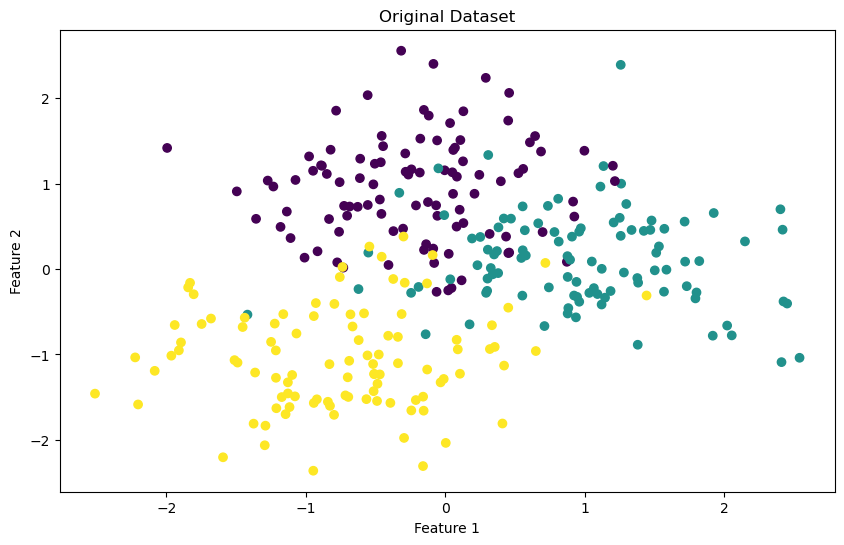

In [2]:
# Generate dataset
X, true_labels = make_blobs(
    n_samples=300,
    n_features=2,
    centers=3,
    cluster_std=5,
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=true_labels, cmap='viridis')
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 2. Train Our K-means Implementation

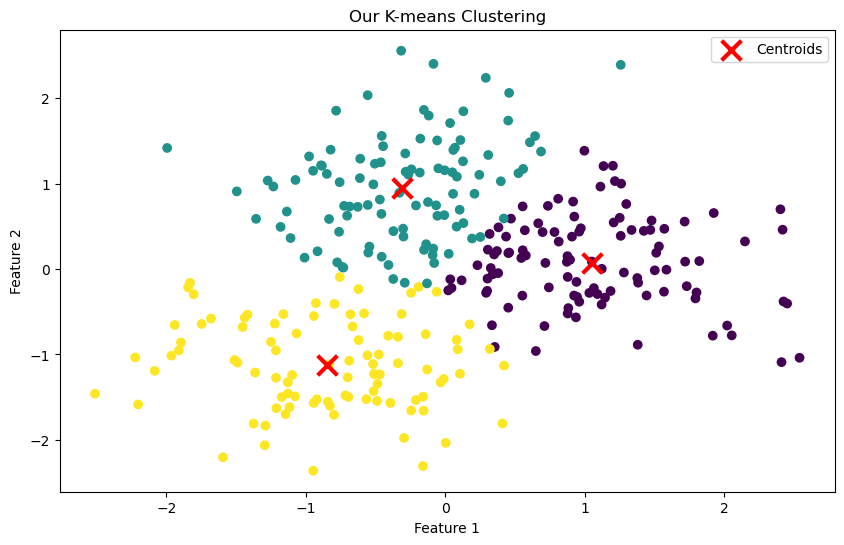

In [3]:
# Initialize and train our K-means
our_kmeans = KMeans(K=3)

# Get cluster assignments
our_labels = our_kmeans.predict(X_scaled)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=our_labels, cmap='viridis')
plt.scatter(our_kmeans.centroids[:, 0], our_kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Our K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 3. Compare with scikit-learn Implementation

c:\Users\ACER\Desktop\DATA_SCIENCE\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


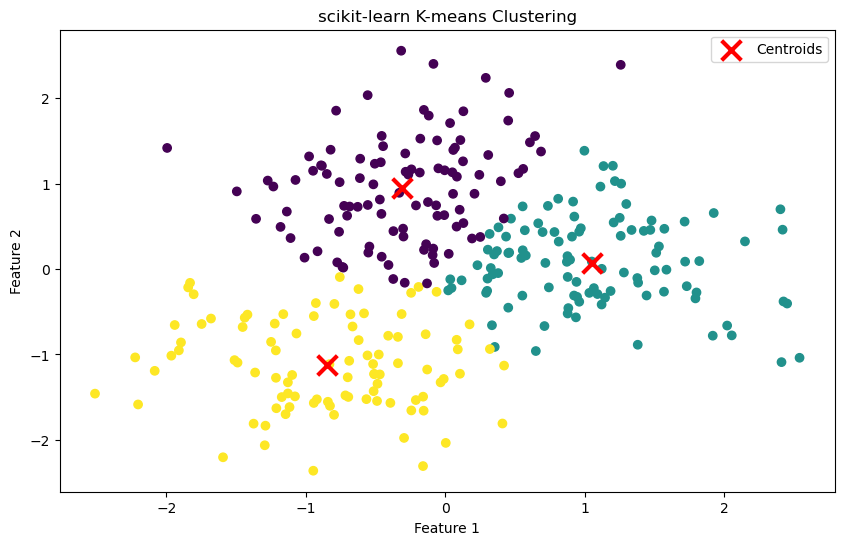

In [4]:
# Train scikit-learn's K-means
sklearn_kmeans = SklearnKMeans(n_clusters=3, random_state=42)
sklearn_kmeans.fit(X_scaled)

# Get cluster assignments
sklearn_labels = sklearn_kmeans.predict(X_scaled)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=sklearn_labels, cmap='viridis')
plt.scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('scikit-learn K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 4. Elbow Method for Optimal K

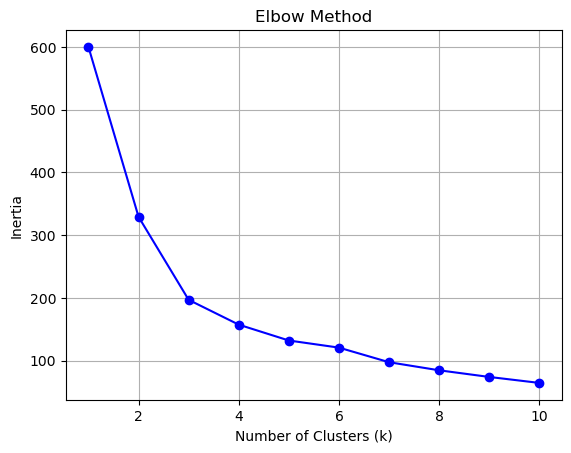

In [9]:
def calculate_inertia(kmeans):
    inertia = 0
    for cluster_idx, cluster in enumerate(kmeans.clusters):
        center = kmeans.centroids[cluster_idx]
        for sample_idx in cluster:
            inertia += np.sum((kmeans.X[sample_idx] - center) ** 2)
    return inertia

inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(K=k)
    kmeans.predict(X_scaled)
    inertia = calculate_inertia(kmeans)
    inertias.append(inertia)

# Plotting Elbow Method
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


## 5. Effect of Different Initializations

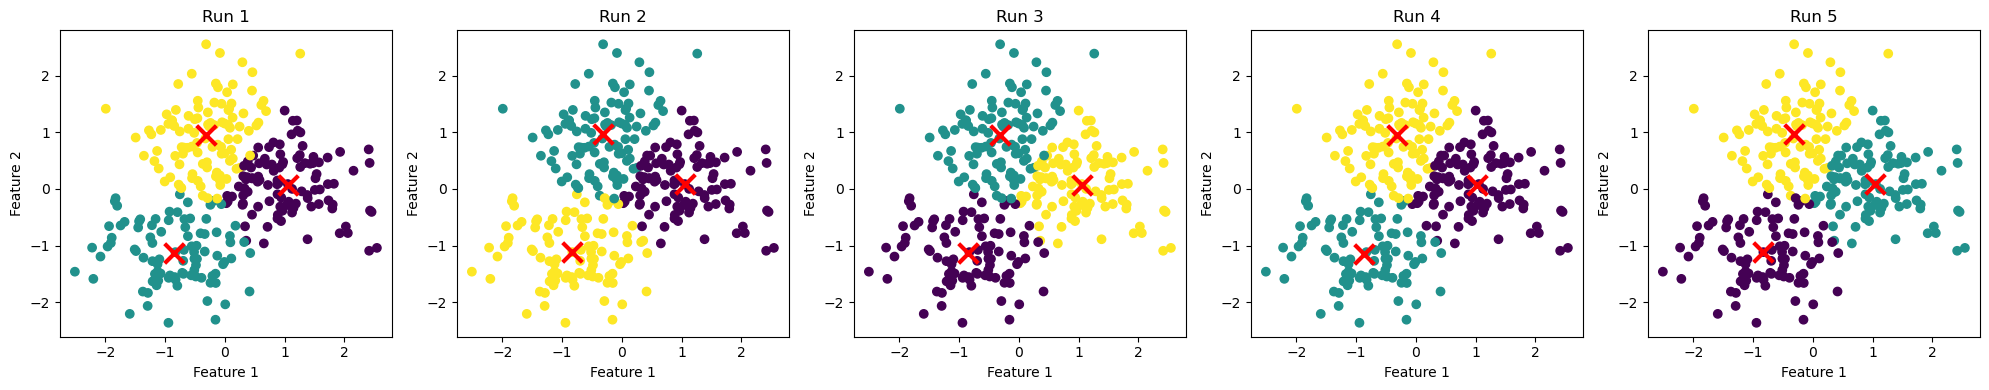

In [11]:
n_runs = 5
fig, axes = plt.subplots(1, n_runs, figsize=(20, 4))

for i in range(n_runs):
    np.random.seed(i)  # Set random seed manually
    kmeans = KMeans(K=3)
    labels = kmeans.predict(X_scaled)
    
    centroids = np.array(kmeans.centroids)  # Convert list to NumPy array for slicing
    
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    axes[i].scatter(centroids[:, 0], centroids[:, 1],
                    c='red', marker='x', s=200, linewidths=3)
    axes[i].set_title(f'Run {i+1}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## 6. Convergence Analysis

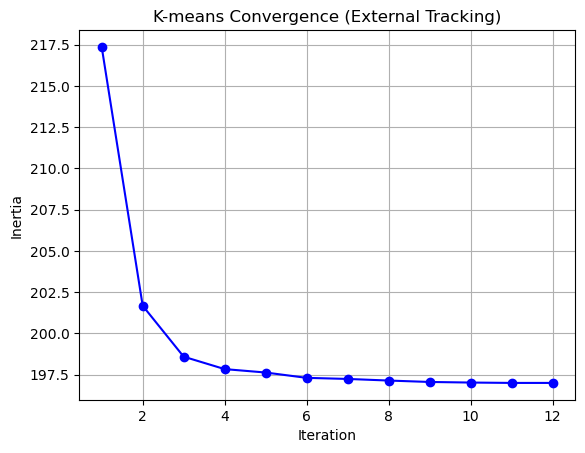

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def track_inertia_over_iterations(X, K=3, max_iter=20):
    n_samples, n_features = X.shape
    np.random.seed(1337)
    
    # Randomly initialize centroids
    random_samples = np.random.choice(n_samples, K, replace=False)
    centroids = [X[i] for i in random_samples]
    
    inertia_history = []

    for _ in range(max_iter):
        # Assign clusters
        clusters = [[] for _ in range(K)]
        for i, sample in enumerate(X):
            distances = [euclidean_distance(sample, point) for point in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)

        # Compute new centroids
        new_centroids = np.zeros((K, n_features))
        for i, cluster in enumerate(clusters):
            if cluster:  # avoid empty clusters
                new_centroids[i] = np.mean(X[cluster], axis=0)
            else:
                new_centroids[i] = centroids[i]

        # Compute inertia
        inertia = 0
        for i, cluster in enumerate(clusters):
            for idx in cluster:
                inertia += np.sum((X[idx] - new_centroids[i]) ** 2)
        inertia_history.append(inertia)

        # Check convergence
        deltas = [euclidean_distance(centroids[i], new_centroids[i]) for i in range(K)]
        if sum(deltas) == 0:
            break

        centroids = new_centroids.copy()

    return inertia_history

inertia_history = track_inertia_over_iterations(X_scaled, K=3, max_iter=20)

plt.plot(range(1, len(inertia_history) + 1), inertia_history, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Inertia')
plt.title('K-means Convergence (External Tracking)')
plt.grid(True)
plt.show()

